In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
from keras.applications import VGG16
from keras import Model

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import save_model


from scipy.spatial.distance import cosine

from matplotlib import pyplot as plt

import os
import cv2
import pickle
from tqdm import tqdm

In [3]:
def create_vgg16_feature_extractor_model():
  vgg16_model = VGG16()
  model = Model(inputs=vgg16_model.inputs, outputs=vgg16_model.layers[-2].output)
  return model

In [4]:
def plot_one_image_features(one_image_features):
  # plt.figure(figsize=(16,4))
  plt.plot(one_image_features)

In [5]:
def get_one_image_features(image_path):
  # load an image from file
  one_image = load_img(image_path, target_size=(224, 224))
  # convert the image pixels to a numpy array
  one_image = img_to_array(one_image)
  # reshape data for the model
  one_image = one_image.reshape((1, one_image.shape[0], one_image.shape[1], one_image.shape[2]))
  # prepare the image for the VGG model
  one_image = preprocess_input(one_image)
  # get extracted features
  one_image_features = model.predict(one_image)
  print(f'Features Shape of One Input Image: {one_image_features.shape}')
  print(f'Features Dimension of One Input Image: {one_image_features.ndim}')
  print(f'Features of One Input Image: {one_image_features}')

  return one_image_features[0]

In [6]:
def get_all_images_features(folder_path):
  all_images_features = []
  print("Preapring Feature Vector for all Images")
  for img in tqdm(os.listdir(folder_path)):
    # image_path
    image_path = folder_path + '/' + img
    # load an image from file
    image = load_img(image_path, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get extracted features
    feature = model.predict(image)
    # append feature in a list
    all_images_features.append(feature[0])
    # Check Shape
  return all_images_features

In [7]:
def plot_matching_images(all_cosine_distance):
  plt.figure(figsize=(10,5))
  all_db_images = os.listdir(all_images_path)
  all_cosine_distance = sorted(all_cosine_distance)
  for idx,i in enumerate(all_cosine_distance[1:10]):
    img = cv2.imread(all_images_path + '/' + all_db_images[i[1]])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.subplot(4,3,idx+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(all_db_images[i[1]] + '=' + str(round(i[0],2)))
    plt.tight_layout()
  plt.show()

In [8]:
def calculate_cosine_distance_with_all_DB_images(query_image_features, all_images_features):
  all_cosine_distance = []
  print("Calculating Cosine Distance with all Images")
  for idx,f in enumerate(all_images_features):
    cos_distance = cosine(query_image_features, f)
    all_cosine_distance.append([cos_distance, idx])
  return all_cosine_distance

In [9]:
def find_matching_image(query_image_path):
  query_image_features = get_one_image_features(query_image_path)
  all_cosine_distance = calculate_cosine_distance_with_all_DB_images(query_image_features, all_images_features)
  plot_matching_images(all_cosine_distance)

In [10]:
model = create_vgg16_feature_extractor_model()

all_images_path = "/content/drive/MyDrive/Sample_Images"

all_images_features = get_all_images_features(all_images_path)

print(f'Length of all_images_features : {len(all_images_features)}')
print(f'Shape of all_images_features : {all_images_features[0].shape}')


553467904/553467096 [==============================] - 6s 0us/step


  0%|          | 0/88 [00:00<?, ?it/s]

Preapring Feature Vector for all Images


 26%|██▌       | 23/88 [00:25<01:15,  1.16s/it]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 88/88 [01:31<00:00,  1.04s/it]

Length of all_images_features : 88
Shape of all_images_features : (4096,)


Features Shape of One Input Image: (1, 4096)
Features Dimension of One Input Image: 2
Features of One Input Image: [[0.        2.1780324 1.4391952 ... 0.        1.3083173 2.755836 ]]
Calculating Cosine Distance with all Images


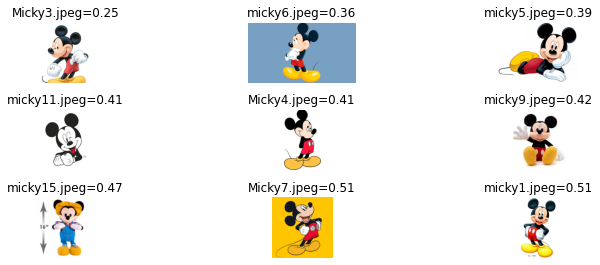

In [26]:
query_image_path = "/content/drive/MyDrive/Sample_Images/micky10.jpeg"
find_matching_image(query_image_path)

In [ ]:
plot_one_image_features(one_image_features)

In [ ]:
def save_model_and_features():
  save_model(model, 'vgg_feature_extraction_model.h5')
  pickle.dump(all_images_features, open('vgg16_features.pkl', 'wb+'))

In [ ]:
save_model_and_features()

**REFERENCES**

https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/

https://keras.io/api/applications/vgg/#vgg16-function

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html
